## Indeed It Is Time To Search My Data Scientist Dream Job!

It has been a challenging but rewarding months learning to become a data scientist at General Assembly and with SuperDataScience. 

I have learned how to use Jupyter Notebook as you can see. I also learn how to program with Python and it's many associated libraries such as Pandas for data mugging, Matploylib for visualization, BeautifulSoup for web-scrapping, Skit-learn for machine learning, natural language processing, and statistical concepts and modeling to name a few. 

It is time to apply my proudly acquired skills for good use. First, I need to find out the data scientist job market and the salary ranges so that I can start my dream job search. 


### 1. Import Libraries

In [1]:
# First import all the necessary libraries for webscrapping & pandas to store
# resutls into a dataframe
from bs4 import BeautifulSoup
import requests
import urllib
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize": (8, 4)})
import re
import numpy as np
fig, ax = plt.subplots(figsize = (11, 7))

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 2. Scrap Data Science Jobs from Indeed.com

In [2]:
# First, take a look at the sample indeed data scientist job search result in Atlanta, GA. 

url = 'https://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=Atlanta%2C+GA'
response = requests.get(url)
html_doc = response.text

# Check the first 500 words to see how it looks like
html_doc[:500]



'<!DOCTYPE html>\n<html lang="en">\n<head>\n<meta http-equiv="content-type" content="text/html;charset=UTF-8">\n<script type="text/javascript" src="/s/f42152d/en_US.js"></script>\n<link href="/s/ecdfb5e/jobsearch_all.css" rel="stylesheet" type="text/css">\n<link rel="alternate" type="application/rss+xml" title="Data Scientist $20,000 Jobs, Employment in Atlanta, GA" href="http://rss.indeed.com/rss?q=data+scientist+%2420%2C000&l=Atlanta%2C+GA">\n<link rel="alternate" media="only screen and (max-width: 64'

In [3]:
# make the soup

soup = BeautifulSoup(html_doc, 'lxml')

# prettify the soup
pretty_soup = soup.prettify()

# find the job results that I can get the job information
print (pretty_soup[80000:90000])

# From the <div class "row result", I can get all the information that I need from a div class row result


1;border-bottom-color:#133FBB;display:inline-block;width:auto;}
.inwrapBorderTop{border-top:1px solid #69F;display:inline-block;background-color:#3163F2;filter:progid:DXImageTransform.Microsoft.gradient(startColorstr='#3163F2',endColorstr='#2B57D5');background:-webkit-gradient(linear,left top,left bottom,from(#3163F2),to(#2B57D5));background:-moz-linear-gradient(top,#3163F2,#2B57D5);background:linear-gradient(top,#3163F2,#2B57D5);}
.inwrapBorder .input_submit{background: transparent;border:0;color:#fff;font-family:Arial;font-size:15px;margin:0;padding:4px 9px;cursor:pointer;_padding:3px;}
.inwrapBorder a.input_submit{text-decoration: none; display: block;}

.inwrapBorder:hover{border-color:#235af6;border-top-color:#4072ff;border-bottom-color:#1e4fd9;}
.inwrapBorderTop:hover{border-top-color:#7ba7ff;background-color:#4273ff;filter:progid:DXImageTransform.Microsoft.gradient(startColorstr='#4273ff',endColorstr='#3364f1');background:-webkit-gradient(linear,left top,left bottom,from(#4273ff

In [4]:
# Setup an empty dataframe contains the features that I am interested in getting from indeed.com
jobpost = pd.DataFrame(columns = ['city', 'location', 'jobtitle', 'company', 'salary', 'job_desc'])

In [5]:
# Try how to extract the information
soup.find('span', {'class': 'company'}).get_text()

'\n\n    Boehringer Ingelheim'

In [6]:
soup.find('span', {'class': 'no-wrap'}).get_text()

'relevance -\n            date'

In [7]:
soup.find('a', {'data-tn-element': 'jobTitle'}).get_text()

'Data Scientist'

In [8]:
soup.find('span', {'class': 'location'}).get_text()

'Duluth, GA'

In [9]:
soup.find('span', {'class': 'summary'}).get_text()

'\n                            Executing data mining and analytics projects with high potential return and inventing/iterating novel solutions to challenging data-related problems will be the...'

In [10]:
# I spread out the cities in the North East, South West, South East, West for the job market outlook
# and scrape indeed using BeutifulSoup. 

# After 2 weeks trials and errors, I finally came up with a clearner code to scrap the information
# for analysis

max_results_per_city = 500

cities = ['New+York', 'Chicago', 'Baltimore', 'Philadelphia','Boston', 'Pittsburgh',
          'San+Francisco', 'Los+Angeles', 'San+Diego', 'Denver', 'Salt+Lake+City', 
          'Phoenix', 'Tucson', 'Austin', 'Dallas', 'Houston', 'San+Antonio', 'Albuquerque',
          'Atlanta','Miami', 'Raleigh', 'Nashville', 'Charlotte', 'Birmingham', 'New+Orleans']


for city in cities:
    for page in range(0, max_results_per_city, 10):
        page = requests.get("http://www.indeed.com/jobs?q=data+scientist+%2430%2C000&l={}&start={}".format(city, page))
        time.sleep(1)
        soup = BeautifulSoup(page.content, 'lxml')
        for entry in soup.find_all('div', {'class': 'row'}):
            try:
                location = entry.find('span', {'class': 'location'}).get_text()  
                jobtitle = entry.find('a', {'data-tn-element': 'jobTitle'}).get_text()
                company = entry.find('span', {'class': 'company'}).get_text().strip().replace('\n', '')
                salary = entry.find('span', {'class': 'no-wrap'})
                job_desc = entry.find('span', {'class': 'summary'}).get_text().replace('\n', '')   
                jobpost.loc[len(jobpost)]= [city, location, jobtitle, company, salary, job_desc]
            except AttributeError:
                print ('Entry is missing something! No worry though!')

Entry is missing something! No worry though!


In [11]:
# Check how many jobpost being scrapped.

jobpost.shape

# It shows around eighteen thousand! Good!

(18181, 6)

In [12]:
# Take a peek at the scrapped job posts 

jobpost.head(10)

# There are a lot of jobs do not have salary information. 

,city,location,jobtitle,company,salary,job_desc
0,New+York,"Rochester, NY",Data Scientist,Lockheed Martin,None,The applicant is e...
1,New+York,"New York, NY",Principal Senior Data Scientist,Barnes & Noble College,None,Providing day-to-d...
2,New+York,"New York, NY",BI Developer,1010data,None,Work with data sci...
3,New+York,"New York, NY 10003 (Greenwich Village area)",Data Scientist,Payfone,None,The Data Scientist will:. The Data...
4,New+York,"New York, NY 10154 (Midtown area)","Associate, Data Scientist/Statistics - Financi...",KPMG,None,"Machine learning, data visualizati..."
5,New+York,"New York, NY","Data Scientist, Analytics",Facebook,None,The Data Scientist Analytics role ...
6,New+York,"New York, NY",Data Scientist,Tilting Point,None,Reporting to the Senior Data Scien...
7,New+York,New York State,Quantitative Developer/Analyst,Clearpool Group,None,Experience with Artificial Intelli...
8,New+York,"New York, NY 10022 (Midtown area)",Data Scientist,The Boston Consulting Group,None,Understand business research chall...
9,New+York,"New York, NY","Data Scientist, Analytics",VaynerMedia LLC,None,Familiarity and experience with in...


In [13]:
# Save it to .csv file

jobpost.to_csv("scrapped_jobpost_01_18", encoding = 'utf-8', index = False)


### 3. Exploratory Data Analysis (EDA)

In [14]:
# Retrive the jobpost

job_result = pd.read_csv('./scrapped_jobpost_01_18', encoding = 'utf-8')
                        

In [15]:
# Check how many posts were srapped from all the cities I chose
job_result.shape

# There are 18181 rows of data and 6 features I am interested in. 

(18181, 6)

In [16]:
# Check the jobs that only have salary included. For some reason, the <span class="no-wrap"> also scrapped. 
# No problem, this can be removed. 
# There seems to be some duplicates. 

job_result.sort_values(['salary']).head(3)

,city,location,jobtitle,company,salary,job_desc
2540,Philadelphia,"King of Prussia, PA",Data Scientist,Jobspring Partners,"<span class=""no-wrap"">\n $100,0...",This Fortune 500 company is seekin...
2500,Philadelphia,"King of Prussia, PA",Data Scientist,Jobspring Partners,"<span class=""no-wrap"">\n $100,0...",This Fortune 500 company is seekin...
2255,Philadelphia,"Philadelphia, PA",Data Scientist - Big Data,"Computer Enterprises, Inc. (CEI)","<span class=""no-wrap"">\n $100,0...",Uses data mining and data analysis...


In [17]:
# check result column data types

job_result.info()

# all the columns have data type string. We need to slice & dice the salary column to get the min & max 
# salary to calculate the median salary. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18181 entries, 0 to 18180
Data columns (total 6 columns):
city        18181 non-null object
location    18181 non-null object
jobtitle    18181 non-null object
company     18181 non-null object
salary      2020 non-null object
job_desc    18181 non-null object
dtypes: object(6)
memory usage: 852.3+ KB


In [18]:
job_result.isnull().sum()

# as expected, salary column has a lot of missing value from the salary column. 
# will use the existing salary data to make the predictions of the jobs that have missing salalary data. 

city            0
location        0
jobtitle        0
company         0
salary      16161
job_desc        0
dtype: int64

In [19]:
job_result.salary.value_counts(dropna=False).sample(10)


# Not all the salary are yearly salary. Some are monthly, some are hourly. Interesting.
# Standardize the salary to annual salary is required. 
# For some reason, when I scrapped the site, it won't allow me to get the text out of the
# span class = 'no-wrap' tag. No problem, I will just need to do some clean up. 

<span class="no-wrap">\n                Estimated salary: $47,000 - $60,000 a year</span>      4
<span class="no-wrap">\n                $140,000 - $160,000 a year</span>                      1
<span class="no-wrap">\n                Estimated salary: $53,000 - $68,000 a year</span>      4
<span class="no-wrap">\n                Estimated salary: $135,000 - $172,000 a year</span>    1
<span class="no-wrap">\n                Estimated salary: $123,000 - $157,000 a year</span>    1
<span class="no-wrap">\n                $33 - $35 an hour</span>                               1
<span class="no-wrap">\n                $40,000 - $51,096 a year</span>                        1
<span class="no-wrap">\n                $60,435 - $161,497 a year</span>                       1
<span class="no-wrap">\n                $5,259 - $7,359 a month</span>                         1
<span class="no-wrap">\n                $80,000 - $120,000 a year</span>                       4
Name: salary, dtype: int64

In [20]:
# Replace/remove no-wrap stuff

job_result['salary'] = job_result.salary.str.replace('<span class="no-wrap">\n', '')
job_result['salary'] = job_result.salary.str.replace('Estimated salary:', '')
job_result['salary'] = job_result.salary.str.replace('</span>', '')
job_result['salary'] = job_result.salary.str.replace('$', '')
job_result['salary'] = job_result.salary.str.replace(',', '')
                                                

In [21]:
job_result.sort_values(['salary']).head(3)
# All the no-wrap stuff, $ sign, and , are removed. 

,city,location,jobtitle,company,salary,job_desc
3084,Boston,"Waltham, MA",Data Analyst/Scientist,QIAGEN,100000 - 127000 a year,"Day to day, you will be doing sign..."
177,New+York,"New York, NY 10003 (Greenwich Village area)",Data Scientist - Test & Learn Analytics,"J.Crew Group, Inc.",100000 - 127000 a year,Data Scientist – Test and Learn Analytics. Han...
11049,Houston,"Houston, TX",Data Scientist,Houston Methodist,100000 - 127000 a year,The Data Scientist should leverage...


In [22]:
job_result.salary.value_counts(dropna=False).sample(10)

                6076 - 8427 a month        1
                180000 a year              3
                 143000 - 182000 a year    1
                45000 - 60000 a year       2
                62000 - 80000 a year       1
                100000 - 150000 a year     6
                 31000 - 39000 a year      1
                43871 - 60402 a year       1
                100000 - 120000 a year     6
                150000 - 240000 a year     2
Name: salary, dtype: int64

In [23]:
# The salary usually comes in ranges. Let's treat the lower range as miniumn salary and higher range as maximum salary.
# split the salary columns so that we can slide out min & max salary

job_result['split_salary'] = job_result.salary.str.split()

In [24]:
# after splitting, slice out minimum offered salary
job_result['min_salary'] = job_result.split_salary.str.get(0)

In [25]:
# convert the salary to float
job_result['min_salary']=pd.to_numeric(job_result['min_salary'], errors='coerce')

In [26]:
# get the maxium salary
job_result['max_salary'] = job_result.split_salary.str.get(2)

In [27]:
# convert maximum salary to float
job_result['max_salary']=pd.to_numeric(job_result['max_salary'], errors='coerce')

In [28]:
job_result.info()

# Both the min & max salary now are float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18181 entries, 0 to 18180
Data columns (total 9 columns):
city            18181 non-null object
location        18181 non-null object
jobtitle        18181 non-null object
company         18181 non-null object
salary          2020 non-null object
job_desc        18181 non-null object
split_salary    2020 non-null object
min_salary      2020 non-null float64
max_salary      1614 non-null float64
dtypes: float64(2), object(7)
memory usage: 1.2+ MB


In [29]:
# Check mininum salary value to see if they are being sliced out correctly
job_result.sort_values(['min_salary'], ascending=True)[430:450]

# This looks pretty good. Now I need to fix those that are hourly & monthly wages.
# I have noticed minimim hourly wages usually below $100. Daily rate somewhere between $140 - $500.  Monthly will be around $2000 - $11000.
# A for loop to convert these numbers to yearly salary should do it. 


,city,location,jobtitle,company,salary,job_desc,split_salary,min_salary,max_salary
13966,Atlanta,"Atlanta, GA 30328",Senior Software Engineer,Matrix Resources,80 an hour,Our Data Platform will pave the wa...,"[80, an, hour]",80.0,NaN
13861,Atlanta,"Atlanta, GA 30328",Senior Software Engineer,Matrix Resources,80 an hour,Our Data Platform will pave the wa...,"[80, an, hour]",80.0,NaN
13906,Atlanta,"Atlanta, GA 30328",Senior Software Engineer,Matrix Resources,80 an hour,Our Data Platform will pave the wa...,"[80, an, hour]",80.0,NaN
13693,Atlanta,"Atlanta, GA 30328",Senior Software Engineer,Matrix Resources,80 an hour,Our Data Platform will pave the wa...,"[80, an, hour]",80.0,NaN
13708,Atlanta,"Atlanta, GA 30328",Senior Software Engineer,Matrix Resources,80 an hour,Our Data Platform will pave the wa...,"[80, an, hour]",80.0,NaN
13722,Atlanta,"Atlanta, GA 30328",Senior Software Engineer,Matrix Resources,80 an hour,Our Data Platform will pave the wa...,"[80, an, hour]",80.0,NaN
13678,Atlanta,"Atlanta, GA 30328",Senior Software Engineer,Matrix Resources,80 an hour,Our Data Platform will pave the wa...,"[80, an, hour]",80.0,NaN
13737,Atlanta,"Atlanta, GA 30328",Senior Software Engineer,Matrix Resources,80 an hour,Our Data Platform will pave the wa...,"[80, an, hour]",80.0,NaN
13755,Atlanta,"Atlanta, GA 30328",Senior Software Engineer,Matrix Resources,80 an hour,Our Data Platform will pave the wa...,"[80, an, hour]",80.0,NaN
13767,Atlanta,"Atlanta, GA 30328",Senior Software Engineer,Matrix Resources,80 an hour,Our Data Platform will pave the wa...,"[80, an, hour]",80.0,NaN


In [30]:
# write a function to convert hourly & monthly salary to annual salary


def convert_wage(wage):
        if wage < 100:
            return wage * 40 * 50 # 40 hours a week & 50 weeks (2-week vacation)
        elif (wage > 100) & (wage <= 500):
            return wage * 5 * 50  # 5 days a week & 50 weeks (2-week vacation)
        elif (wage >= 1000) & (wage <= 11000):
            return wage * 12      # 12 months
        else:
            return wage   

In [31]:
# Apply the convert wage function to the minium salary variable.

job_result['annual_min_salary'] = job_result.min_salary.apply(convert_wage)

In [32]:
# Apply the converted wage function to the maximum slary variable.
job_result['annual_max_salary'] = job_result.max_salary.apply(convert_wage)

In [33]:
job_result.sort_values(['annual_min_salary'])[:10]

# Yes, there are a lot duplicates. 

,city,location,jobtitle,company,salary,job_desc,split_salary,min_salary,max_salary,annual_min_salary,annual_max_salary
7577,Salt+Lake+City,"Salt Lake City, UT",Research Assistant/Analyst,University of Utah,12.02 - 21.63 an hour,Prepares format for final disposit...,"[12.02, -, 21.63, an, hour]",12.02,21.63,24040.0,43260.0
12570,Albuquerque,"Albuquerque, NM","Coord, Biomedical Research Support",University of New Mexico,12.38 - 18.57 an hour,Abstracting of medical data. Knowl...,"[12.38, -, 18.57, an, hour]",12.38,18.57,24760.0,37140.0
7533,Salt+Lake+City,"Salt Lake County, UT",Injury Research Analyst,State of Utah,13.55 - 18.38 an hour,Has the ability to use data entry ...,"[13.55, -, 18.38, an, hour]",13.55,18.38,27100.0,36760.0
12571,Albuquerque,"Albuquerque, NM","Coord,Research",University of New Mexico,13.62 - 20.43 an hour,Scientists associated with the UNMCCC Cancer C...,"[13.62, -, 20.43, an, hour]",13.62,20.43,27240.0,40860.0
1656,Baltimore,"Baltimore, MD",SARE Coordinator/Research Technologist,Johns Hopkins University,13.73 - 18.87 an hour,This component will include conduc...,"[13.73, -, 18.87, an, hour]",13.73,18.87,27460.0,37740.0
592,New+York,"New York, NY",Field Inspector,DEPT OF ENVIRONMENT PROTECTION,29288 - 37165 a year,Travel required approximately 50% ...,"[29288, -, 37165, a, year]",29288.00,37165.00,29288.0,37165.0
604,New+York,"New York, NY",Field Inspector,DEPT OF ENVIRONMENT PROTECTION,29288 - 37165 a year,Travel required approximately 50% ...,"[29288, -, 37165, a, year]",29288.00,37165.00,29288.0,37165.0
9043,Tucson,"Tucson, AZ","Program Coordinator (Phoenix, AZ)",University of Arizona,29443 - 40000 a year,The College inspires and trains in...,"[29443, -, 40000, a, year]",29443.00,40000.00,29443.0,40000.0
9572,Austin,"Austin, TX",Machine Learning Project,Whisper Audio,15 - 25 an hour,Paid Voice Project in January/Febr...,"[15, -, 25, an, hour]",15.00,25.00,30000.0,50000.0
5708,Los+Angeles,"Commerce, CA 90040",Marketing Research Analyst,New Sun Investment Group,30000 - 60000 a year,Manage and resolve the key data is...,"[30000, -, 60000, a, year]",30000.00,60000.00,30000.0,60000.0


In [34]:
# Check dimension again to ensure the df still intact. 

job_result.shape

(18181, 11)

In [35]:
# Delete the split_salary column since I no longer need it. 
del job_result['split_salary']


In [36]:
# remove the duplicated entries. 
job_result = job_result.drop_duplicates()

In [37]:
# after dropping the duplicates, there are only 5672 job post left.

job_result.shape

(5632, 10)

In [38]:
# Check the city names
job_result['city'].unique()

# I will remove the + sign

array(['New+York', 'Chicago', 'Baltimore', 'Philadelphia', 'Boston',
       'Pittsburgh', 'San+Francisco', 'Los+Angeles', 'San+Diego', 'Denver',
       'Salt+Lake+City', 'Phoenix', 'Tucson', 'Austin', 'Dallas',
       'Houston', 'San+Antonio', 'Albuquerque', 'Atlanta', 'Miami',
       'Raleigh', 'Nashville', 'Charlotte', 'Birmingham', 'New+Orleans'], dtype=object)

In [39]:
# remove the + sign for the cities
job_result['city'] = job_result.city.str.replace('+', ' ')
job_result['city'].unique()

array(['New York', 'Chicago', 'Baltimore', 'Philadelphia', 'Boston',
       'Pittsburgh', 'San Francisco', 'Los Angeles', 'San Diego', 'Denver',
       'Salt Lake City', 'Phoenix', 'Tucson', 'Austin', 'Dallas',
       'Houston', 'San Antonio', 'Albuquerque', 'Atlanta', 'Miami',
       'Raleigh', 'Nashville', 'Charlotte', 'Birmingham', 'New Orleans'], dtype=object)

In [40]:
# Map cities to different regions. 

job_result['region'] = job_result.city.map(lambda x: 'North East' if x in ['New York', 'Chicago', 'Philadelphia', 'Pittsburgh', 'Baltimore', 'Boston']
                                          else 'South East' if x in ['Atlanta', 'Raleigh', 'Miami', 'New Orleans', 'Nashville', 'Charlotte', 'Birmingham']
                                          else 'South West' if x in ['Austin', 'Dallas', 'Houston', 'San Antonio', 'Phoenix', 'Tucson', 'Albuquerque']
                                          else 'West' if x in ['San Francisco', 'Los Angeles', 'San Diego', 'Denver', 'Seattle', 'Portland', 'Salt Lake City']
                                          else 'na')
job_result['region'].unique()

array(['North East', 'West', 'South West', 'South East'], dtype=object)

In [41]:
# There are job titles do not seem to be data scientist. Let's see what job title the dataset has

job_result['jobtitle'].value_counts()

# Some titles do not look like data analytic or data science related. 
# Since I will be only interested in data analytic / scientist, I will focus on 
# job title that contains data scienits or machine learning. 

Data Scientist                                                     357
Senior Data Scientist                                               98
Data Engineer                                                       52
Research Analyst                                                    51
Machine Learning Engineer                                           40
Quantitative Analyst                                                28
Scientist                                                           24
Software Engineer                                                   23
Sr. Data Scientist                                                  23
Data Analyst                                                        22
Statistician                                                        20
Research Scientist                                                  20
Lead Data Scientist                                                 20
Market Research Analyst                                             18
Princi

In [42]:
# save as .csv file
job_result.to_csv('job_result', encoding = 'utf-8', index = False)


In [43]:
# Create a SQL database to query 

from pandas.io import sql
import sqlite3

job_result = pd.read_csv('./job_result', encoding = 'utf-8')

job_result_con = sqlite3.connect('./job_result.db.sqlite')

job_result.to_sql(name = 'job_result', con = job_result_con, if_exists = 'replace', index = False)

In [44]:
# create a definition to query the job_title db

def jobtitleQ(query, db = job_result_con):
    return sql.read_sql(query, db)

In [45]:
job_result.sample(5)

,city,location,jobtitle,company,salary,job_desc,min_salary,max_salary,annual_min_salary,annual_max_salary,region
2792,Los Angeles,"Westwood, CA",Clinical Laboratory Scientist,UCLA HEALTH,NaN,"Pipetting, computer data entry. Re...",NaN,NaN,NaN,NaN,West
1766,Boston,"Boston, MA",Machine Learning Engineer - QuantumBlack,McKinsey & Company,NaN,You´ll work closely with Data Engi...,NaN,NaN,NaN,NaN,North East
4119,Austin,"Austin, TX",Data Scientist,Diverse Lynx,NaN,"Python, GCP, AWS, Calculus, Big Da...",NaN,NaN,NaN,NaN,South West
2330,San Francisco,"San Francisco, CA 94117 (Haight-Ashbury area)","Postdoctoral Fellowship, Data Institute",University of San Francisco,NaN,"Postdoctoral Fellowship, Data Inst...",NaN,NaN,NaN,NaN,West
1101,Baltimore,"Greenbelt, MD",Principal Systems Engineer (AWS),Genex Systems,NaN,The systems engineer will be a mem...,NaN,NaN,NaN,NaN,North East


In [46]:
# query job_title or description that pertientnent to data scientist, data analysts, machine learning etc.

ds_jobs = jobtitleQ(
    '''SELECT DISTINCT
    region,
    city,
    jobtitle,
    company,
    job_desc,
    annual_min_salary,
    annual_max_salary
    FROM 
    job_result
    WHERE
    lower(jobtitle) like '%data scientist%'
    or lower(jobtitle) like '%analyst%'
    or lower(jobtitle) like '%machine learning%'
    or lower(jobtitle) like '%operations research%'
    or lower(jobtitle) like '%stat%'
    or lower(jobtitle) like '%ml%'
    or lower(jobtitle) like '%data%'
    or lower(jobtitle) like '%research%';
    ''')

ds_jobs.head()

,region,city,jobtitle,company,job_desc,annual_min_salary,annual_max_salary
0,North East,New York,Data Scientist,Lockheed Martin,The applicant is e...,NaN,NaN
1,North East,New York,Principal Senior Data Scientist,Barnes & Noble College,Providing day-to-d...,NaN,NaN
2,North East,New York,Data Scientist,Payfone,The Data Scientist will:. The Data...,NaN,NaN
3,North East,New York,"Associate, Data Scientist/Statistics - Financi...",KPMG,"Machine learning, data visualizati...",NaN,NaN
4,North East,New York,"Data Scientist, Analytics",Facebook,The Data Scientist Analytics role ...,NaN,NaN


In [47]:
ds_jobs.shape

(3162, 7)

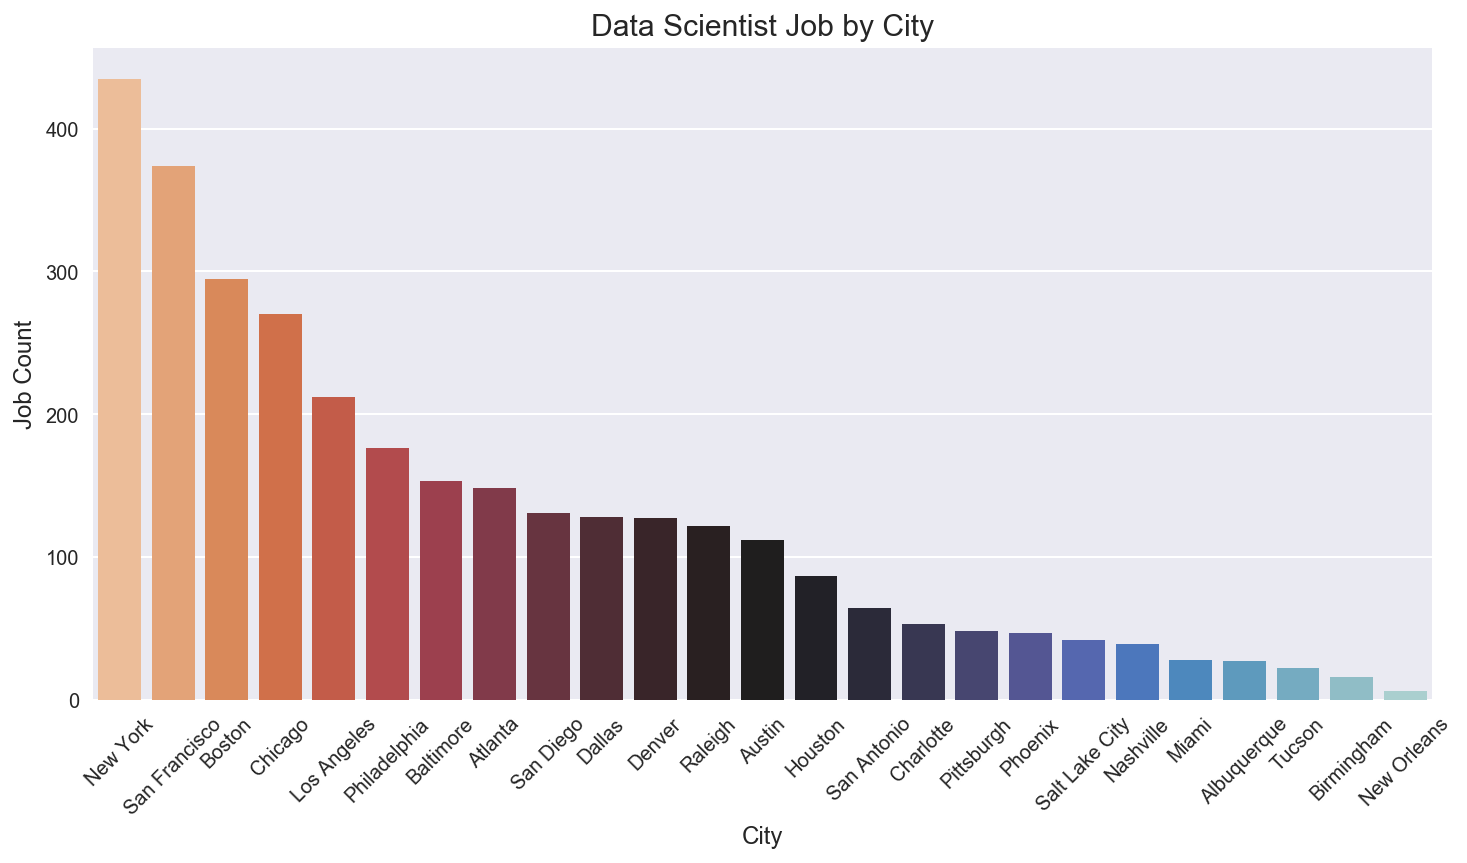

In [48]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'city', data = ds_jobs, palette = 'icefire_r',\
             order = ds_jobs['city'].value_counts().index)
plt.ylabel('Job Count', fontsize = 12)
plt.xlabel('City', fontsize = 12)
plt.xticks(rotation = 45)
plt.title('Data Scientist Job by City', fontsize = 15)
plt.show()

#### The count plot shows New York, San Francisco, Boston, Chicago, Los Angeles have plenty of Data Scientist Jobs. In the south, Atlanta data sciense job market is very solid. 
#### Let's look at the job openings by regions

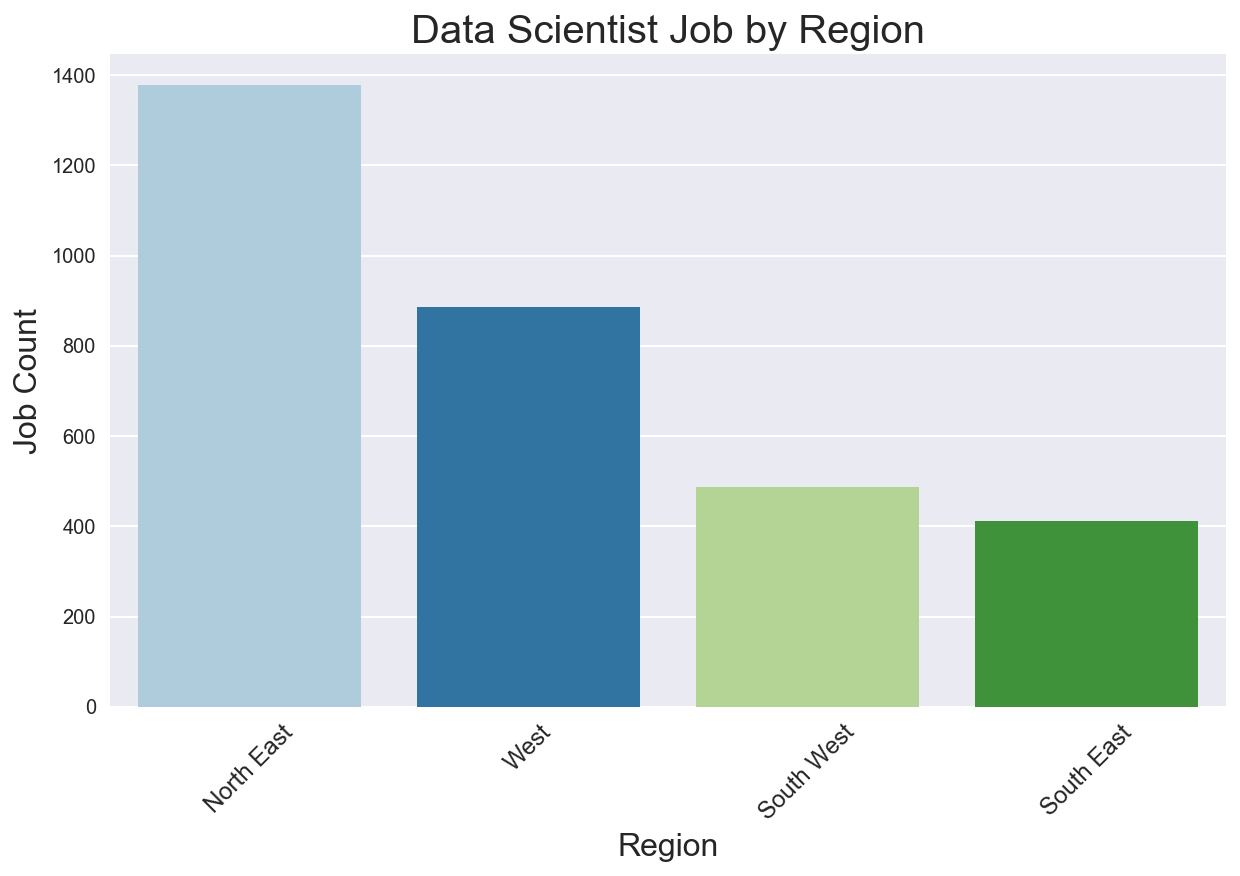

In [49]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'region', data = ds_jobs, palette = 'Paired')
plt.ylabel('Job Count', fontsize = 16)
plt.xlabel('Region', fontsize = 16)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Data Scientist Job by Region', fontsize = 20)
plt.show()

#### By region, North East is Data Scientist heaven, followed by the West. 

In [50]:
# I also want to know the jobposts that have salary information that I can
# get the feel of salary ranges of these jobs. Based on the historical salary information, 
# I can make a salary range prediction on the jobs that have missing offering salary information. 
# I will subset a new dataframe called job_salary extracting all the job
# that has annual minimum wage greater than 0 and focus on it.


ds_job_salary = ds_jobs[ds_jobs['annual_min_salary'] > 0].reset_index()

In [51]:
ds_job_salary.head()

,index,region,city,jobtitle,company,job_desc,annual_min_salary,annual_max_salary
0,9,North East,New York,Data Scientist,Vody,You have a background in SQL datab...,60000.0,150000.0
1,10,North East,New York,Data Scientist,Scienaptic Systems Inc,Desired Qualifications & Experienc...,100000.0,150000.0
2,16,North East,New York,Data Scientist,MetroPlus Health Plan,The Data Scientist will be tasked ...,90000.0,115000.0
3,19,North East,New York,Data Scientist,Octane Lending,We are seeking a talented data sci...,115000.0,150000.0
4,28,North East,New York,Data Analyst / Data Scientist,Defined Clarity,We have a client that is looking f...,130000.0,150000.0


In [52]:
ds_job_salary.columns

Index(['index', 'region', 'city', 'jobtitle', 'company', 'job_desc',
       'annual_min_salary', 'annual_max_salary'],
      dtype='object')

In [53]:
# I do not need column index anymore. remove it.

del ds_job_salary['index']

In [54]:
ds_job_salary.shape

# There are only 387 Data Scientist jobposts that have salary information

(387, 7)

In [55]:
ds_job_salary.sort_values(['annual_min_salary'], ascending=True).sample(5)

,region,city,jobtitle,company,job_desc,annual_min_salary,annual_max_salary
113,North East,Baltimore,Sr. Research Assistant,Johns Hopkins University,Develop data collection tools. Wor...,37781.0,51950.0
345,South East,Atlanta,Data Scientist,Mondo,Opportunity for Growth (Senior Dat...,100000.0,120000.0
236,West,Salt Lake City,Sr Research Analyst,University of Utah,Formats data for statistical analy...,45760.0,76640.0
363,South East,Raleigh,RESEARCH GENETICIST (POSTDOCTORAL FELLOW),Department of Agriculture,Knowledge and skills with current ...,62282.0,80963.0
330,South West,Albuquerque,Sr Research Scientist 1,University of New Mexico,At least 2 years of experience wit...,47472.0,71100.0


In [56]:
print ('The median annual salary for is: ', ds_job_salary.annual_min_salary.median())


The median annual salary for is:  90000.0


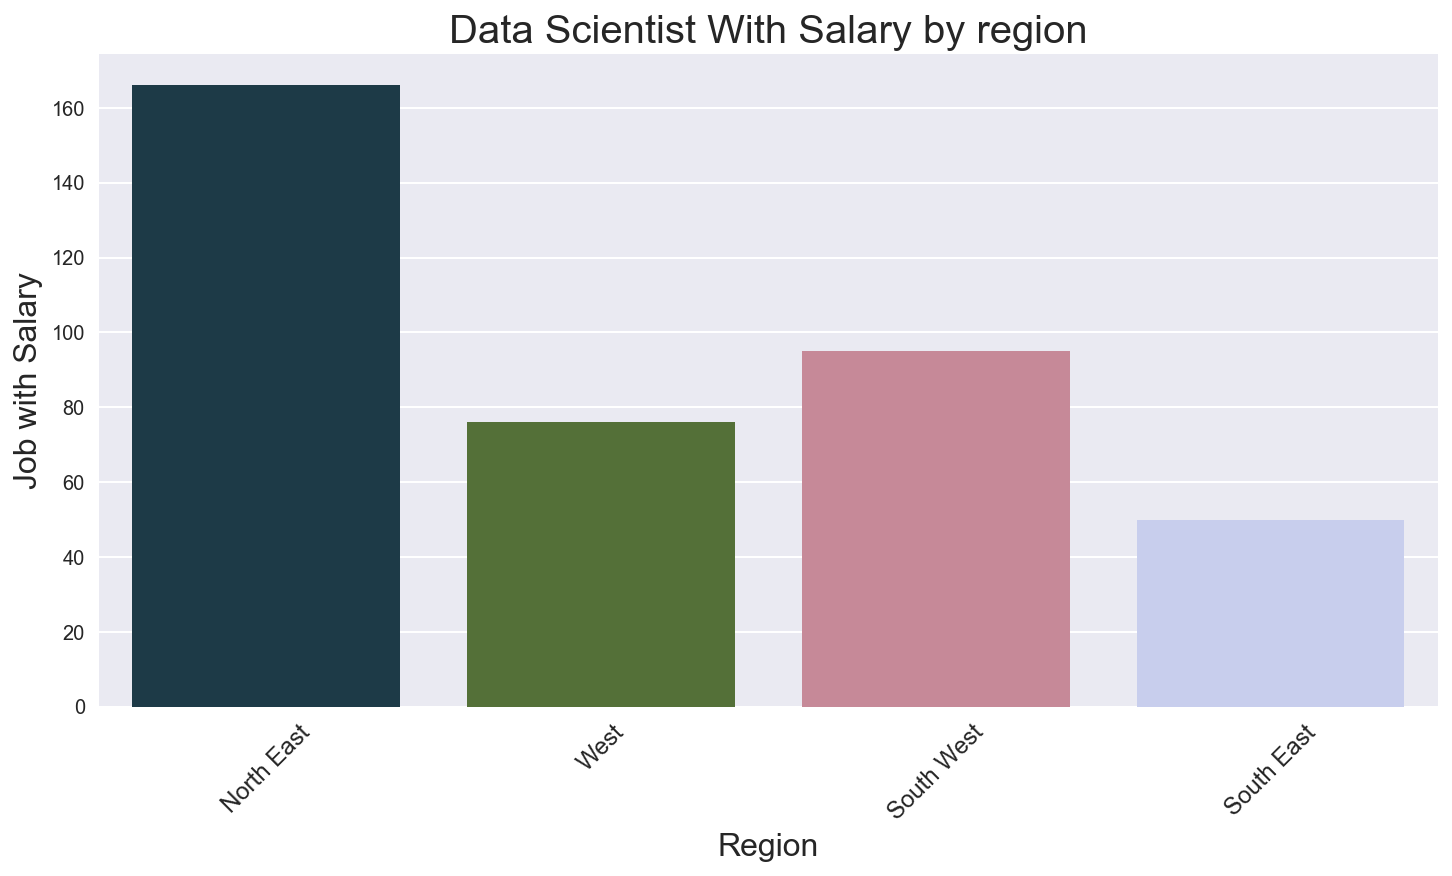

In [57]:
# Visualize the job posts that have offering salary information by region. 

plt.figure(figsize = (12, 6))
sns.countplot(x = 'region', data = ds_job_salary, palette = 'cubehelix')
plt.ylabel('Job with Salary', fontsize = 16)
plt.xlabel('Region', fontsize = 16)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Data Scientist With Salary by region', fontsize = 20)
plt.show()

In [58]:
print ('Portion of data science/analyst jobs has salary information is: ', ds_job_salary.shape[0]/ds_jobs.shape[0])

Portion of data science/analyst jobs has salary information is:  0.12239089184060721


#### There are ~ 12% of job posts that has salary offering information. 

#### Since some of the job posts do not have maximum salary or have only one salary, it is good to predict at least the minium salary and use maxium salary as a reference. 

In [59]:
ds_job_salary.describe()

# The average salary from the 369 Data Scientist/Analyst jobpost ~$87K with standard deviation of $34K.
# This is a very wide standard deviation.

,annual_min_salary,annual_max_salary
count,387.000000,336.000000
mean,87091.568475,115877.142857
std,34505.831507,41785.539555
min,24040.000000,700.000000
25%,59708.000000,83233.250000
50%,90000.000000,120000.000000
75%,111000.000000,147250.000000
max,220000.000000,250000.000000


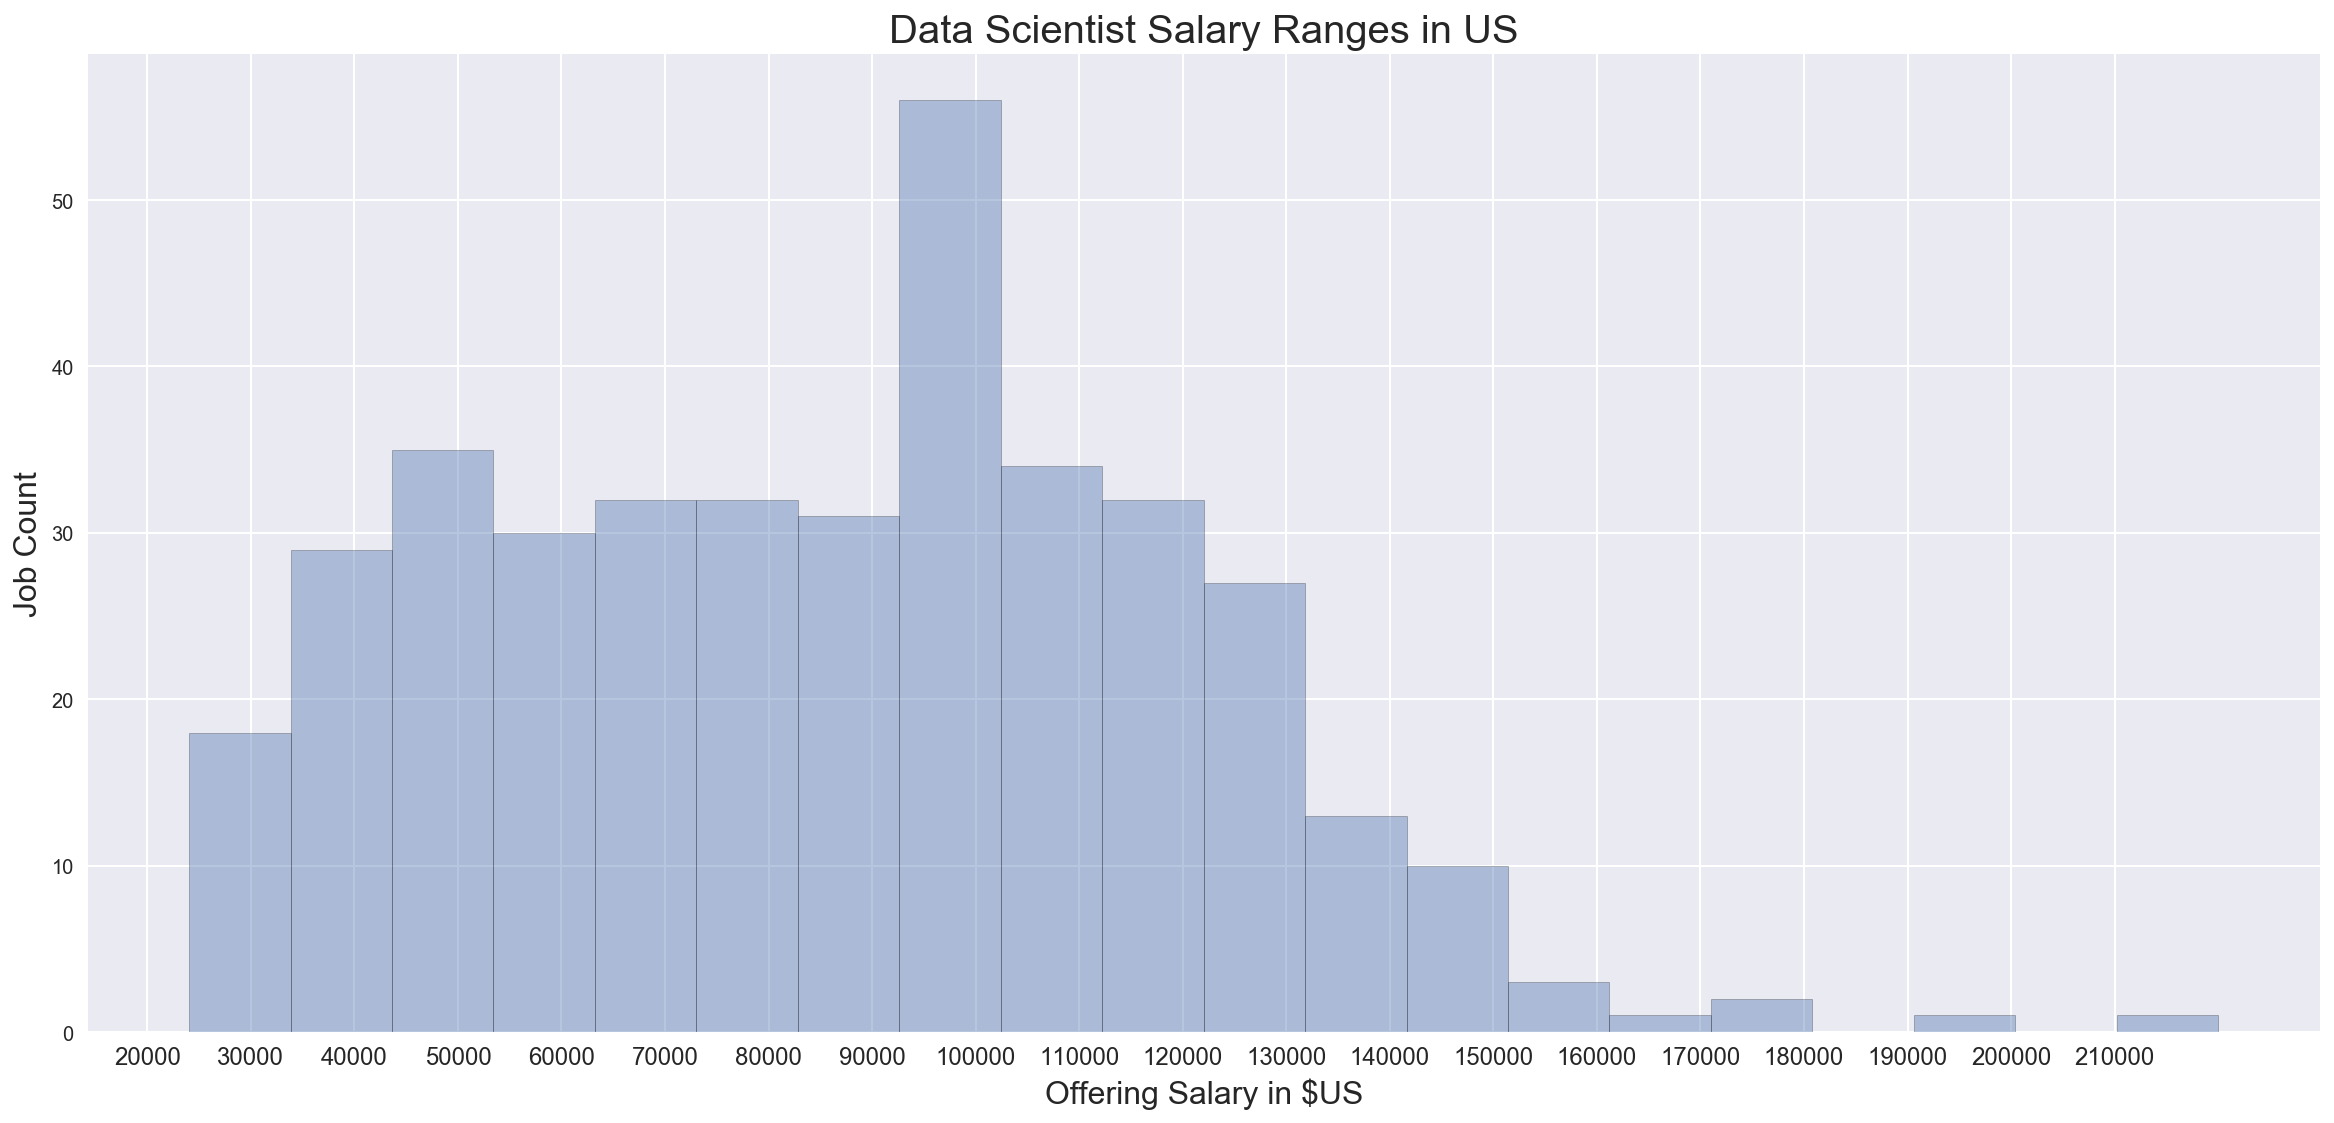

In [60]:
# Visualize the salary distribution.

fig, ax = plt.subplots(figsize = (20, 9))
sns.distplot(ds_job_salary.annual_min_salary, kde = False, bins = 20, hist_kws = {'edgecolor': 'black'})
plt.title('Data Scientist Salary Ranges in US', fontsize = 20) 
plt.xlabel('Offering Salary in $US', fontsize = 16) 
plt.ylabel('Job Count', fontsize = 16)
plt.xticks(np.arange(20000, 220000, 10000), fontsize = 12)
plt.show()

# This is a right skewed distribution. 
# Looking at the salary offering distribution, majority of the salary offerings is around $90 to $ 100K, 
# but there are many in the lower range, less than $50K
# There are some outliners with salary up to $220K. 
# But why are so many in the lower range such as $25 to $50K?
# Is this because of some cities have lower salary or because of the job title?


In [61]:
# Let's subset jobs that has salary offering lower than $50K

low_sal_offer = ds_job_salary[ds_job_salary['annual_min_salary'] <= 50000]


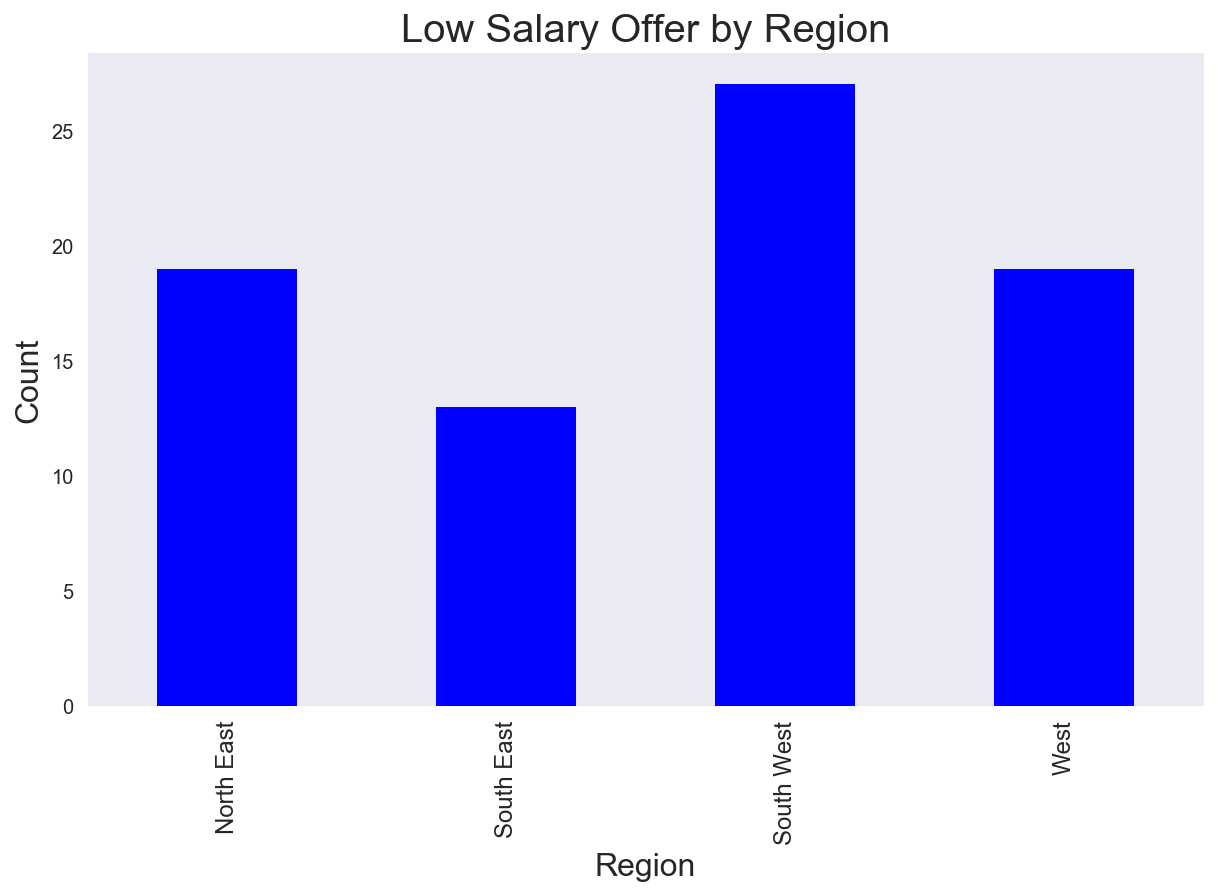

In [62]:
# Take a look at these job by cities
sns.set_style('dark')
low_sal_offer.groupby(['region'])['annual_min_salary'].size().plot(kind = 'bar', figsize = (10, 6), color = 'blue')
plt.title('Low Salary Offer by Region', fontsize = 20)
plt.xlabel('Region', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.xticks(fontsize = 12)
plt.show()

# South West's offering salary tends to be lower. 

In [63]:
# Let's take a look the job titles of these jobs

low_sal_offer.jobtitle

# Job title with Analyst or Research tends to have lower salary offerings. 
# Are the skill requirements for Analyst and Research different than job title data scientist?

5      Quantitative data analysis and modeling consul...
7                              Data Scientist/Consultant
16     Associate Data Scientist - Computational Biolo...
38                                Research Analyst, SUMH
47                        Hebrew speaking Data Scientist
50                                  Research Associate I
54                                Sales Research Analyst
71                                      Research Analyst
79                               Market Research Analyst
98                                 Clinical Statistician
104                                  Statistical Analyst
105                                       Budget Analyst
106                       Institutional Research Analyst
107                             Research Service Analyst
108                                  Research Specialist
110               SARE Coordinator/Research Technologist
113                               Sr. Research Assistant
130                            

In [64]:
ds_job_salary.describe()

,annual_min_salary,annual_max_salary
count,387.000000,336.000000
mean,87091.568475,115877.142857
std,34505.831507,41785.539555
min,24040.000000,700.000000
25%,59708.000000,83233.250000
50%,90000.000000,120000.000000
75%,111000.000000,147250.000000
max,220000.000000,250000.000000


In [65]:
# assign percentile variables

twenty_five = np.percentile(ds_job_salary.annual_min_salary, 25)
fifty = np.percentile(ds_job_salary.annual_min_salary, 50)
seventy_five = np.percentile(ds_job_salary.annual_min_salary, 75)

print(twenty_five, fifty, seventy_five)

59708.0 90000.0 111000.0


In [66]:
# Now that I have the a better picture of salary, I divide the salary into four categories
# low, average, above average, and high

# Looking at the average salary statistics, I can split the salary this way:

# Salary <= 25 percentile is low = 0
# Salary between 26 to 50 percentile is average = 1
# Salary between 51 to 75 percentile is above average = 2
# Salary >=76 perentile is high = 3

ds_job_salary['salary_num_category'] = ds_job_salary.annual_min_salary.map(lambda x: 
                                                                  0 if x <= twenty_five
                                                                  else 1 if (x > twenty_five) & (x <= fifty)
                                                                  else 2 if (x > fifty) & (x <= seventy_five)   
                                                                  else 3)
ds_job_salary['salary_category'] = ds_job_salary.annual_min_salary.map(lambda x: 
                                                              'low' if x <= twenty_five
                                                               else 'average' if (x > twenty_five) & (x <= fifty)
                                                               else 'above average' if (x > fifty) & (x <= seventy_five)  
                                                               else 'high')


In [67]:
ds_job_salary.sample(10)

# Looks good. The classes are assigned as planned. 

,region,city,jobtitle,company,job_desc,annual_min_salary,annual_max_salary,salary_num_category,salary_category
128,North East,Philadelphia,"Data Quality Analyst, Quality Assurance",Excel Health,Internal Data Validation*. The Qua...,60000.0,100000.0,1,average
150,North East,Boston,Data Visualization Developer,Commonwealth of Massachusetts,As Data Visualization Developer yo...,60041.0,92096.0,1,average
9,North East,New York,Data Scientist,Persado,Persado is looking for a Data Scie...,111000.0,141000.0,2,above average
103,North East,Baltimore,Data Scientist - Entry/Mid-Level,National Security Agency,Data Scientists are hired into positions direc...,68586.0,85464.0,1,average
226,West,Denver,Data Science to Patient Value (D2V) Scholars P...,University of Colorado Anschutz Medical Campus,Big Data Science and Engineering (...,50000.0,70000.0,0,low
291,South West,Dallas,"Vice President, Data Science - Machine Learning",Wunderman,Manage existing team of 10-15 data...,132000.0,168000.0,3,high
102,North East,Baltimore,Sr. Research Data Analyst,Johns Hopkins University,Data curation functions will include maintaini...,52260.0,71880.0,0,low
328,South West,Albuquerque,Data Scientist 3/4,Northrop Grumman,Basic Qualifications for a Data Sc...,94000.0,120000.0,2,above average
80,North East,Chicago,SENIOR RESEARCH ANALYST,City of Chicago,Providing data management; Develop...,54768.0,NaN,0,low
101,North East,Baltimore,Data Scientist,Central Intelligence Agency,Data Scientists organize and interpret Big Dat...,58638.0,123234.0,0,low


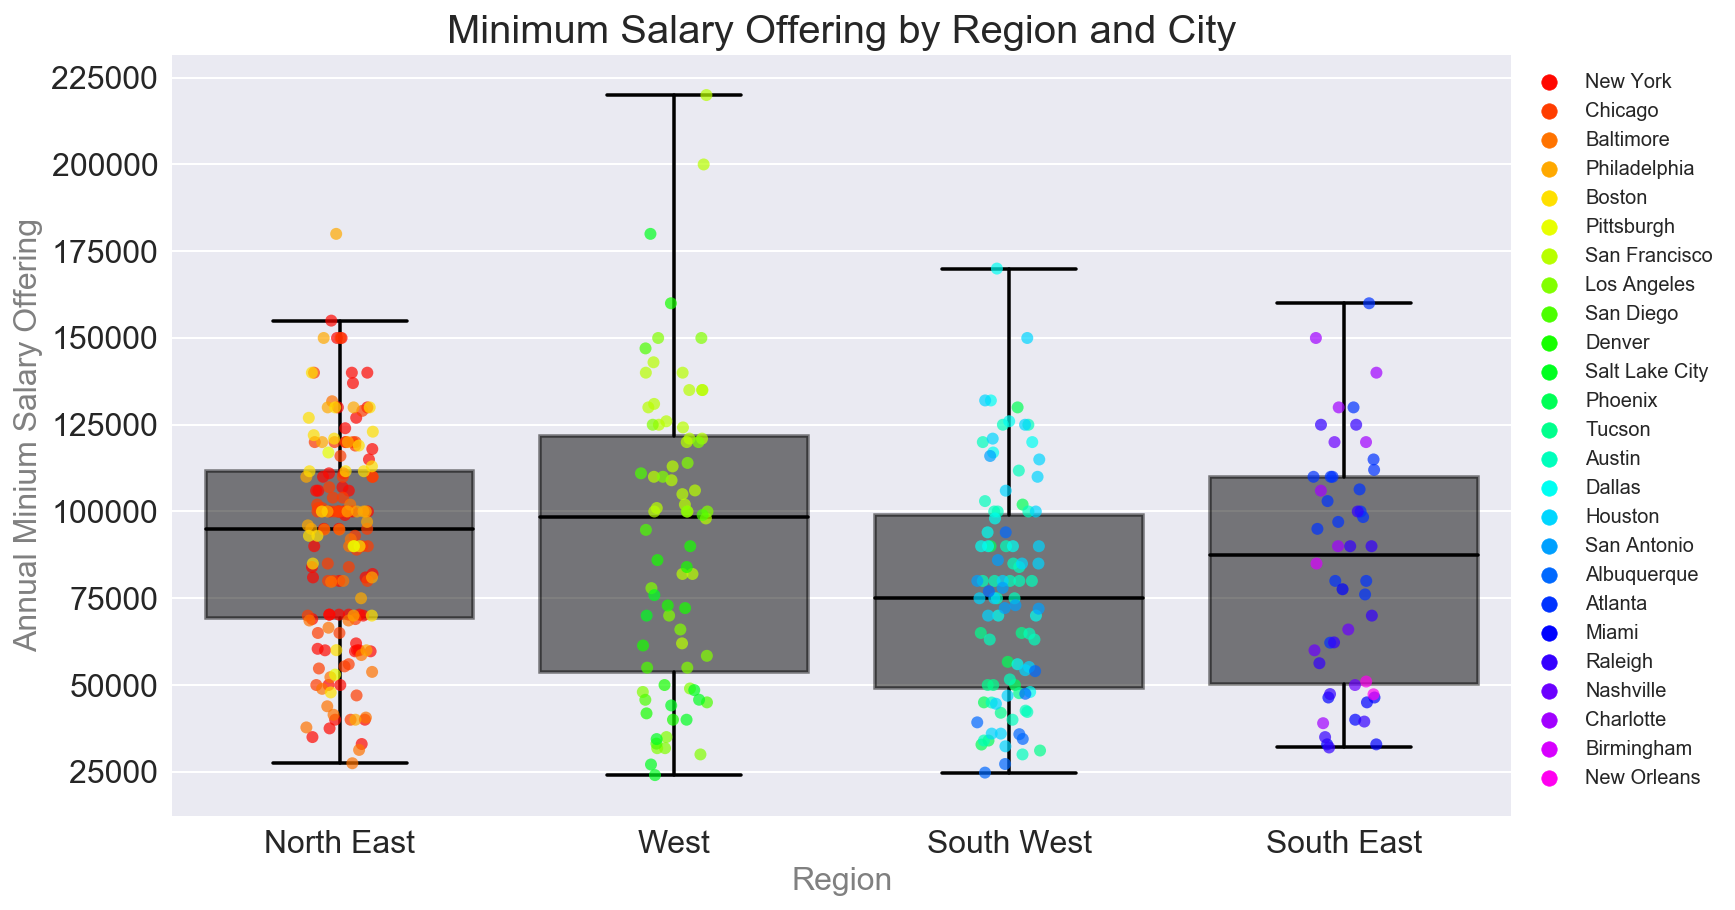

In [68]:
# Visualize job posts by regions and cities with minimum offering salary information. 

sns.set(style = 'darkgrid', palette = 'muted', color_codes = True)
f, ax = plt.subplots(1, 1, figsize = (12, 7))
sns.boxplot(data = ds_job_salary, x = 'region', y = 'annual_min_salary', color = 'black', showfliers=False)
plt.setp(ax.artists, alpha = 0.5)
sns.stripplot(data = ds_job_salary, x = 'region', y = 'annual_min_salary', jitter=True,\
             size = 6, hue = 'city', alpha = 0.7, edgecolor = 'black', palette = 'gist_rainbow')
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.title('Minimum Salary Offering by Region and City', fontsize = 20)
plt.xlabel('Region', fontsize = 16, color = 'gray')
plt.ylabel('Annual Minium Salary Offering', fontsize = 16, color = 'gray')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

#### The West has the highest median offering salary, followed by the North East. The West salary offering variance is also high.  As expected, the West have some very high offerings for data science unicorns :-). 
#### Even though the median salary in the South East is a little bit lower than these two regions, the median salary offering for the South East region is above \$75K. With the cost of living adjustment, South East appears to be a great place to start a data science career. 


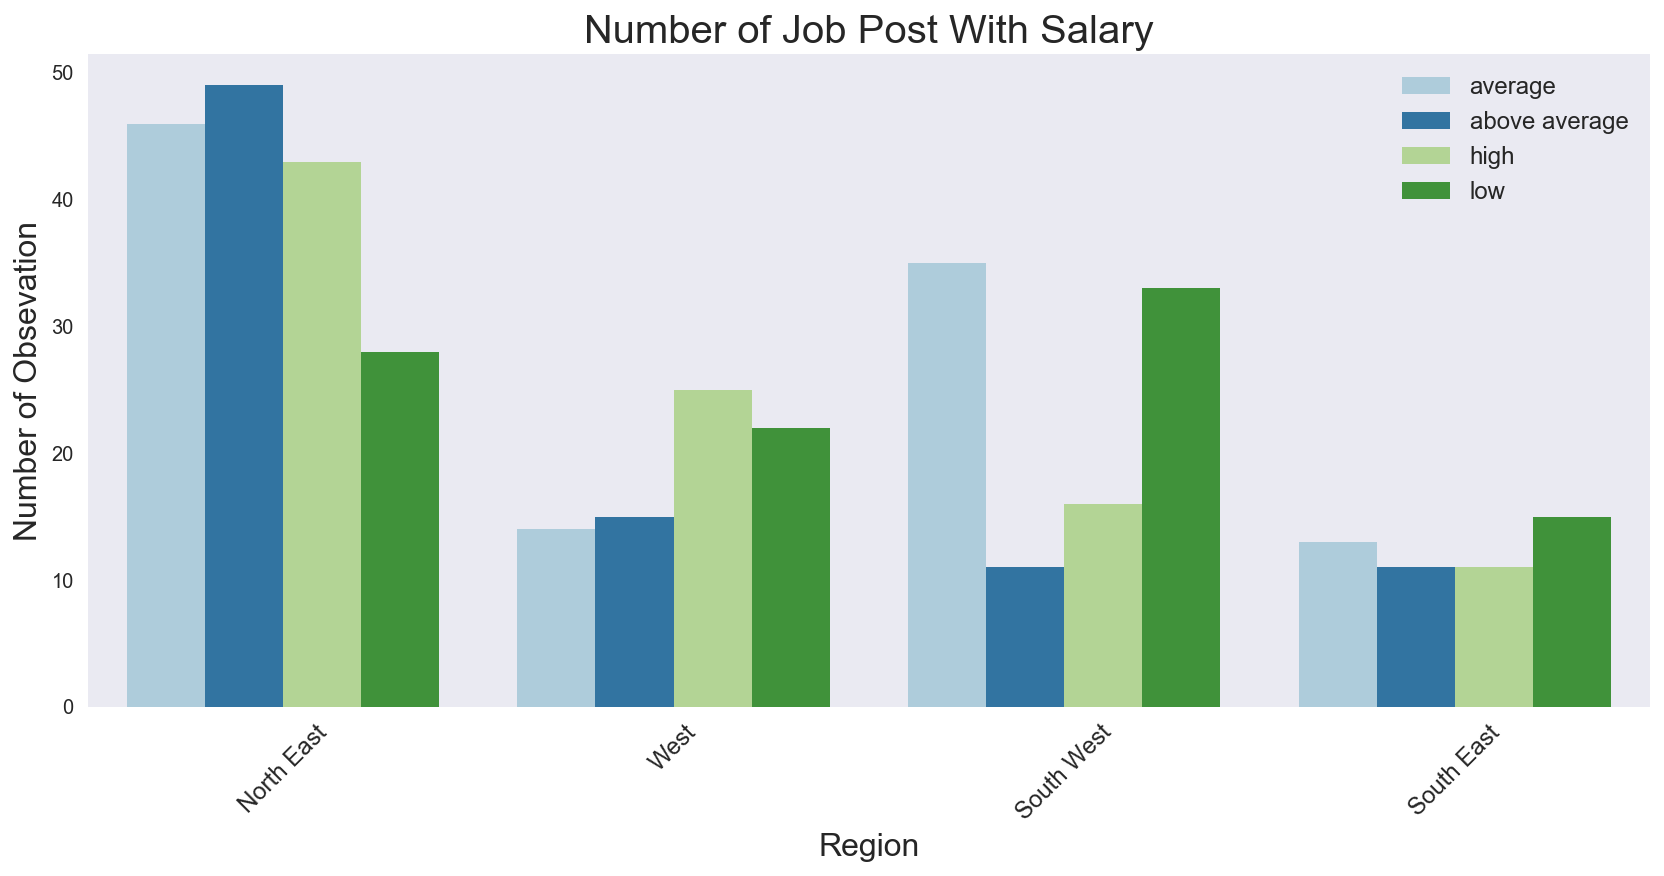

In [69]:
# Another visualiztion of salary categories by region

sns.set_style('dark')
plt.figure(figsize=(14,6))
sns.countplot(x='region', data=ds_job_salary, hue = 'salary_category', palette = 'Paired')
plt.ylabel('Number of Obsevation', fontsize=16)
plt.xlabel('Region', fontsize=16)
plt.title('Number of Job Post With Salary', fontsize = 20)
plt.xticks(rotation = 45, fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 12, bbox_to_anchor = (1,1))
                                        
plt.show()



#### Only ~12% of the data science/analyst job post that has salary information. 
#### According to the central limit theorem, if this data set is truely randomly sampled, it should be a good representation of the population. 
#### North East proportionally have more data scientist & data analyst jobs than the rest of the regions, followed by South West. 
#### West also has many data science jobs available (refer to previous chart showing 'Data Scientist Job by Region'. But many of these job posts do not have salary offering information. 
#### South West proportionally showing more lower salary job posts than the other regions. 
#### South East has evenly distributed salary ranges. Many offers above average salary range.


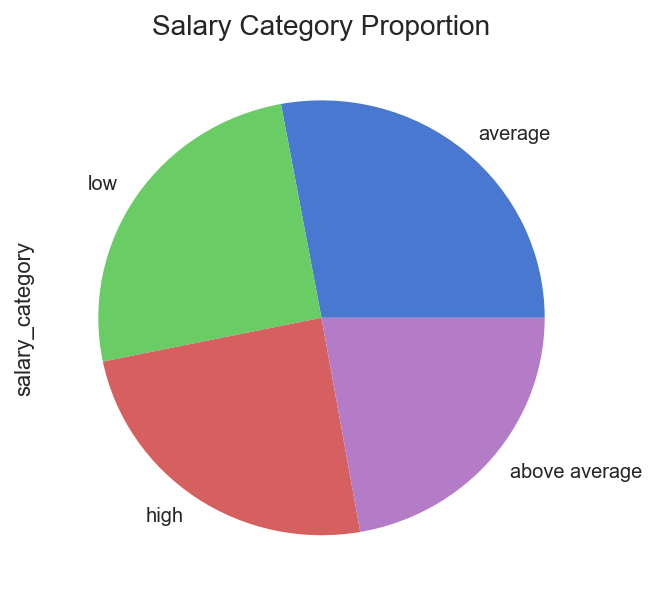

In [70]:
# Salary proportion.

plt.figure(figsize=(5,5))
ds_job_salary.salary_category.value_counts().plot(kind = 'pie', fontsize = 10)
plt.title('Salary Category Proportion', fontsize = 14)
plt.show()

# They are roughly the same proportion with larger share on average salary category. 

---

### 4. Feature Scaling & Extraction

Now that I have a good sense of the salary ranges. It is time to find out the independent variables that contribute to low salary and the skills that grab the high salary posts. 


#### 4.1 Convert cities into dummy variables

In [71]:
# Convert the cities into dummy variables
ds_job_salary_city_dummy = pd.get_dummies(ds_job_salary['city'], prefix = 'city', drop_first=True)

ds_job_salary = pd.concat([ds_job_salary, ds_job_salary_city_dummy], axis = 1)

In [72]:
ds_job_salary.head()

,region,city,jobtitle,company,job_desc,annual_min_salary,annual_max_salary,salary_num_category,salary_category,city_Atlanta,...,city_New York,city_Philadelphia,city_Phoenix,city_Pittsburgh,city_Raleigh,city_Salt Lake City,city_San Antonio,city_San Diego,city_San Francisco,city_Tucson
0,North East,New York,Data Scientist,Vody,You have a background in SQL datab...,60000.0,150000.0,1,average,0,...,1,0,0,0,0,0,0,0,0,0
1,North East,New York,Data Scientist,Scienaptic Systems Inc,Desired Qualifications & Experienc...,100000.0,150000.0,2,above average,0,...,1,0,0,0,0,0,0,0,0,0
2,North East,New York,Data Scientist,MetroPlus Health Plan,The Data Scientist will be tasked ...,90000.0,115000.0,1,average,0,...,1,0,0,0,0,0,0,0,0,0
3,North East,New York,Data Scientist,Octane Lending,We are seeking a talented data sci...,115000.0,150000.0,3,high,0,...,1,0,0,0,0,0,0,0,0,0
4,North East,New York,Data Analyst / Data Scientist,Defined Clarity,We have a client that is looking f...,130000.0,150000.0,3,high,0,...,1,0,0,0,0,0,0,0,0,0


In [73]:
# Let's define features for training and the prediction of salary range categories. 

# Can city alone determine salary offerings?

select_feature = [c for c in ds_job_salary.columns if 'city_' in c]
X = ds_job_salary[select_feature].values

y = ds_job_salary.salary_num_category.values



In [74]:
print (X.shape)
print (y.shape)

(387, 24)
(387,)


#### 4.2 Perform Train-Test Split

In [75]:
# Scale the data to the same scale. This is an important step because many algorithm uses Euclidian distance calculation.
# If the dataset is not on the same scale, large numbers will dominate the output causing inaccurate output. 

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

Xs = ss.fit_transform(X)

/Users/connie/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [78]:
# Peform train-test split. I use 75% data for training and 25% for testing. 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size = 0.25, random_state = 0)

#### For classification problems, there are a few classical classifier algorithms to use. 

#### The Classic one is Logistic Regression. Logistic Regression uses maximum likelihood to calculate the probability which class the response belong to with the provided predictors. It is fast and easy to interpret. It performs well if the categories can be linearly separable.

#### The other classic classifier is K-nearest neighbors (KNN). KNN uses Euclidean distance method to find the closest K points the response closes to, then applies Bayes rule to assign the response to the class with the highest probability. If categories are not linearly separable, KNN with a correct level of K would perform well. 

#### When it comes to classifier, tree based classifier Random Forest also performs well. Random Forest takes an average decision from team of trees' voting results and assign the response to the class that has the highest votes. Random Forest also performs well on categories that are not linearly separable. 

#### Let's try these three models. 

### 5. Model Training & Prediction

#### 5.1 Let's try Logistic Regression model

In [79]:
# Let's try logistic regression to find out if this model will provide better accuracy score

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

logreg = LogisticRegression()

logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [80]:
# Make predictions
lr_y_pred = logreg.predict(X_test)

print ('Logistic Regression Accuracy Score: ', metrics.accuracy_score(y_test, lr_y_pred))

Logistic Regression Accuracy Score:  0.484536082474


In [81]:
# Check prediction results from confusion matrix

lr_cm = metrics.confusion_matrix(y_test, lr_y_pred)

lr_confu_matrix = pd.DataFrame(lr_cm, index = ['Actual: 0', 'Actual: 1', 'Actual: 2', 'Actual: 3'],
                           columns = ['Predicted: 0', 'Predicted: 1', 'Predicted: 2', 'Predicted: 3'])
lr_confu_matrix

,Predicted: 0,Predicted: 1,Predicted: 2,Predicted: 3
Actual: 0,19,6,0,0
Actual: 1,8,15,2,1
Actual: 2,2,13,7,4
Actual: 3,4,9,1,6


In [83]:
# Print the Logistic Regression prediction report

print(classification_report(y_test, lr_y_pred))

             precision    recall  f1-score   support

          0       0.58      0.76      0.66        25
          1       0.35      0.58      0.43        26
          2       0.70      0.27      0.39        26
          3       0.55      0.30      0.39        20

avg / total       0.54      0.48      0.47        97



#### Logistic Regression Prediction Confusion Matrix:

 * 25 low salary, 19 are correctly predicted
 * 26 average salary, 15 are correctly predicted
 * 26 above average salary, 7 are correctly predicted
 * 20 high salary, 6 are correctly predicted
 
#### There are total of 97 test records, 47 correctly predicted. The accuracy rate is 48%. 
#### Logistics Regression performs ok.

#### 5.2 Let's try K-Nearest Neighbors model

In [84]:
from sklearn.neighbors import KNeighborsClassifier

# Since KNN finds the nearest neighbors according to a distance metrics. 
# We need to make sure the predictors are in standard scales for fair calculation.
# KNN prediction accuracy usually depends on the number of neighbors used. 
# To test the numbers of neighbors make the best predictions, let's try
# neighbors 3 to 10. To make it more efficient, create a for loop to try 
# K from 3 to 10.

k_range = range(3, 10, 1)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    print ('KNN Neighbors Accuracy Score for {:2f}: '.format(metrics.accuracy_score(y_test, knn_pred)))    

KNN Neighbors Accuracy Score for 0.319588: 
KNN Neighbors Accuracy Score for 0.412371: 
KNN Neighbors Accuracy Score for 0.402062: 
KNN Neighbors Accuracy Score for 0.484536: 
KNN Neighbors Accuracy Score for 0.443299: 
KNN Neighbors Accuracy Score for 0.474227: 
KNN Neighbors Accuracy Score for 0.432990: 


The above scores shows using 6 neighbors to categorize the salary range yields the highest accuracy score 48%. It performs about the same as Logistic Regression model. 

In [85]:
knn_6 = KNeighborsClassifier(n_neighbors = 6)
knn_6.fit(X_train, y_train)
knn_6_pred = knn_6.predict(X_test)
print ('KNN with 5 neighbors Accuracy Score: ', metrics.accuracy_score(y_test, knn_6_pred))

KNN with 5 neighbors Accuracy Score:  0.484536082474


In [86]:
# Check KNN_5 prediction results from confusion matrix

knn_cm = metrics.confusion_matrix(y_test, knn_6_pred)

knn_confu_matrix = pd.DataFrame(knn_cm, index = ['Actual: 0', 'Actual: 1', 'Actual: 2', 'Actual: 3'],
                           columns = ['Predicted: 0', 'Predicted: 1', 'Predicted: 2', 'Predicted: 3'])
knn_confu_matrix

,Predicted: 0,Predicted: 1,Predicted: 2,Predicted: 3
Actual: 0,19,6,0,0
Actual: 1,8,15,2,1
Actual: 2,2,13,9,2
Actual: 3,4,9,3,4


In [88]:
# Print the KNN_5 prediction report

print(classification_report(y_test, knn_6_pred))

             precision    recall  f1-score   support

          0       0.58      0.76      0.66        25
          1       0.35      0.58      0.43        26
          2       0.64      0.35      0.45        26
          3       0.57      0.20      0.30        20

avg / total       0.53      0.48      0.47        97



#### KNN Prediction Confusion Matrix:

 * 25 low salary, 19 are correctly predicted
 * 26 average salary, 15 are correctly predicted
 * 26 above average salary, 9 are correctly predicted
 * 20 high salary, 4 are correctly predicted
 
#### There are total of 97 test records, 47 correctly predicted. The accuracy rate is 48%. 
#### KNN performs and Logistic Regression peform about the same.

#### 5.3 Let's Try Random Forest 

In [89]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the Randomforest model with 3000 trees
rf = RandomForestClassifier(n_estimators=3000)

# Fit/train the the data
rf.fit(X_train, y_train)

# Make prediction
rf_y_pred = rf.predict(X_test)

# Check DecisionTree accuracy
print ('Random Forest Prediction Accuracy Score: ', metrics.accuracy_score(y_test, rf_y_pred))



Random Forest Prediction Accuracy Score:  0.453608247423


In [90]:
# Check how well my prediction is using confusion matrix

rf_cm = metrics.confusion_matrix(y_test, rf_y_pred)

rf_confu_matrix = pd.DataFrame(rf_cm, index = ['Actual: 0', 'Actual: 1', 'Actual: 2', 'Actual: 3'],
                           columns = ['Predicted: 0', 'Predicted: 1', 'Predicted: 2', 'Predicted: 3'])
rf_confu_matrix

,Predicted: 0,Predicted: 1,Predicted: 2,Predicted: 3
Actual: 0,19,6,0,0
Actual: 1,8,14,1,3
Actual: 2,2,13,3,8
Actual: 3,4,8,0,8


In [91]:
# Print the random forest prediction report

print(classification_report(y_test, rf_y_pred))

             precision    recall  f1-score   support

          0       0.58      0.76      0.66        25
          1       0.34      0.54      0.42        26
          2       0.75      0.12      0.20        26
          3       0.42      0.40      0.41        20

avg / total       0.53      0.45      0.42        97



#### Random Forest Prediction Confusion Matrix:

 * 25 low salary, 19 are correctly predicted
 * 26 average salary, 14 are correctly predicted
 * 26 above average salary, 3 are correctly predicted
 * 20 high salary, 8 are correctly predicted
 
#### There are total of 97 test records, 44 correctly predicted. The accuracy rate is 45%. 
#### Random Forest with 3000 trees does not perform better than KNN nor Logistic Regression.

In [92]:
# Extract feature (city)

rf.feature_importances_

array([ 0.06006789,  0.02906763,  0.04074014,  0.01528812,  0.06933428,
        0.0341549 ,  0.04428156,  0.02904346,  0.02507796,  0.02724276,
        0.03104526,  0.06021059,  0.01859394,  0.02839856,  0.04640632,
        0.04711952,  0.02345312,  0.01669537,  0.02263434,  0.01872465,
        0.0613379 ,  0.05476878,  0.13548454,  0.06082839])

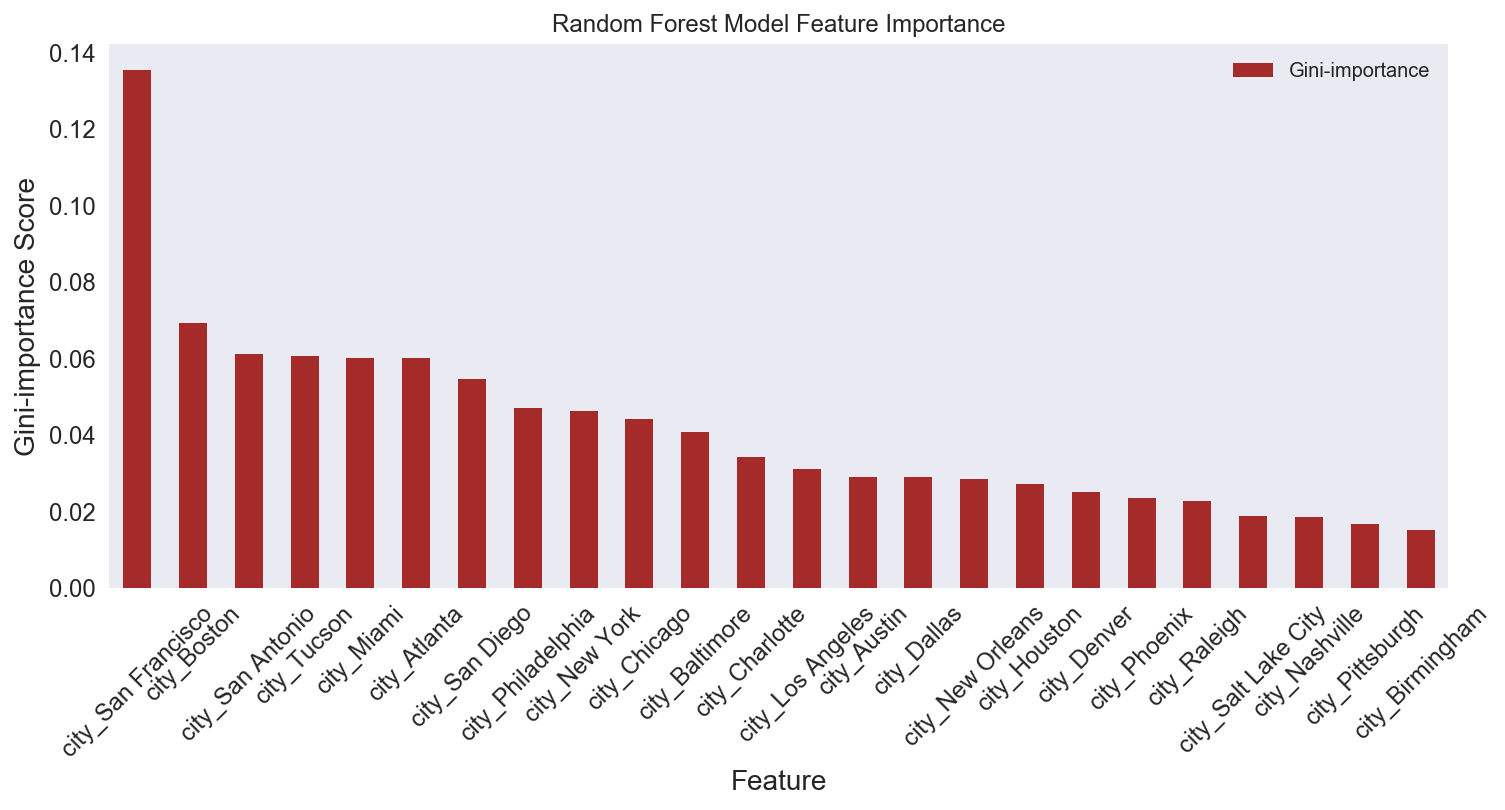

In [93]:
rf_feats= {}
for feature, importance in zip(select_feature, rf.feature_importances_):
    rf_feats[feature] = importance
    
rf_feat_importances = pd.DataFrame.from_dict(rf_feats, orient='index').rename(columns={0:'Gini-importance'})
rf_feat_importances.sort_values(by='Gini-importance', ascending=False).plot(kind = 'bar', 
                                                                            rot=45, 
                                                                            figsize = (12,5), 
                                                                            fontsize = 12, 
                                                                            color = '#A52A2A',
                                                                           title = 'Random Forest Model Feature Importance')
plt.xlabel('Feature', fontsize = 14)
plt.ylabel('Gini-importance Score', fontsize = 14)
plt.show()

#### Random Forest shows San Francisco is the most important city determining the offering salary, followed by Boston, San Antonio, Tucson, and Miami. Ummm, this is interesting. 
#### But the prediction accuracy rate is not very impressive. The city importance does not tell the whole story.

---

#### 5.4 Model Cross Validation

In [94]:
from sklearn.model_selection import cross_val_score

In [95]:
# Cross validate Logistic Regression model

lr_score = cross_val_score(logreg, X, y, cv = 5, scoring = 'accuracy')
print ('Logistic Regression Average Cross Validation Score is: ', np.mean(lr_score))

Logistic Regression Average Cross Validation Score is:  0.199642973061


In [96]:
# Cross validate KNN model

knn_score = cross_val_score(knn_6, X, y, cv = 5, scoring = 'accuracy')
print ('KNN Average Cross Validation Score is: ', np.mean(knn_score))

KNN Average Cross Validation Score is:  0.220020840807


In [97]:
# Cross validate Random Forest model

rf_score = cross_val_score(rf, X, y, cv = 5, scoring = 'accuracy')
print ('Random Forst Average Cross Validation Score is: ', np.mean(rf_score))

Random Forst Average Cross Validation Score is:  0.199642973061


####  All three models - Logistic Regression, KNN, and  Random Forest did not perform well on the salary range predictions using city alone. The models using cities for predictions yield only ~19 to 22%. 
#### This may indicate cites alone do make good predictions.  In other words, cities have little to do with salary offerings. 
#### From the previous analysis, job titles seem to have a lot to do with salary offerings.  Let's analyze job titles using Natural Language Processing.  Once we vectorize the words, let's try using Logistic Regression, KNN, and Naive Bayes classifiers to make predictions.


---

### 6. Using Job Title for Salary Predictions

#### 6.1 Create a Bag of Words for Job Titles

In [98]:
# Convert the words in job titles into vectors. This process called word2vec or bags of words

# First, clean the job title and remove irrelevant words. 

import re
import nltk
from nltk.stem.porter import PorterStemmer
job_title_corpus = []
for i in range(0, ds_job_salary.shape[0]):
    title = re.sub('[^a-zA-Z]', ' ', ds_job_salary['jobtitle'][i])
    title = title.lower()
    title = title.split()
    ps = PorterStemmer()
    title = ' '.join(title)
    job_title_corpus.append(title)


In [99]:
# Check the first 3 titles. 
job_title_corpus[:10]

['data scientist',
 'data scientist',
 'data scientist',
 'data scientist',
 'data analyst data scientist',
 'quantitative data analysis and modeling consultant',
 'data scientist',
 'data scientist consultant',
 'data scientist',
 'data scientist']

In [100]:
# Create a bag of words

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500) # take the first 1500 important words
Xdtm = cv.fit_transform(job_title_corpus).toarray()

In [101]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
Xdtm_train, Xdtm_test, y_train, y_test = train_test_split(Xdtm, y, test_size = 0.25, random_state = 0)


#### 6.2  Naive Bayes on Job Title
Naive Bayes usually produce a good results on NLP classification. Let's try Naive Bayes

In [102]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(Xdtm_train, y_train)
GNB_jt_pred = GNB.predict(Xdtm_test)

In [103]:
print ('Naive Bayes Job Title Prediction Accuracy Score: ', metrics.accuracy_score(y_test, GNB_jt_pred))


Naive Bayes Job Title Prediction Accuracy Score:  0.371134020619


In [104]:
GNB_jt_cm = metrics.confusion_matrix(y_test, GNB_jt_pred)

GNB_jt_confu = pd.DataFrame(GNB_jt_cm, index = ['Actual: 0', 'Actual: 1', 'Actual: 2', 'Actual: 3'],
                           columns = ['Predicted: 0', 'Predicted: 1', 'Predicted: 2', 'Predicted: 3'])
GNB_jt_confu

,Predicted: 0,Predicted: 1,Predicted: 2,Predicted: 3
Actual: 0,5,7,13,0
Actual: 1,3,7,15,1
Actual: 2,0,1,22,3
Actual: 3,0,1,17,2


In [105]:
print(classification_report(y_test, GNB_jt_pred))


             precision    recall  f1-score   support

          0       0.62      0.20      0.30        25
          1       0.44      0.27      0.33        26
          2       0.33      0.85      0.47        26
          3       0.33      0.10      0.15        20

avg / total       0.44      0.37      0.33        97



#### Naive Bayes Using Job Title Prediction Confusion Matrix:
    25 low salary, 5 are correctly predicted
    26 average salary, 7 are correctly predicted
    26 above average salary, 22 are correctly predicted
    20 high salary, 2 are correctly predicted
    
There are total of 97 test records, 36 correctly predicted. The accuracy rate is 37%.

Well, not good.

#### 6.3 Logistic Regression on Job Title

In [106]:
logreg_jt = LogisticRegression()
logreg_jt.fit(Xdtm_train, y_train)
logreg_jt_pred = logreg_jt.predict(Xdtm_test)

In [107]:
print ('Logistic Regression Job Title Prediction Accuracy Score: ', metrics.accuracy_score(y_test, logreg_jt_pred))


Logistic Regression Job Title Prediction Accuracy Score:  0.453608247423


In [108]:
logreg_jt_cm = metrics.confusion_matrix(y_test, logreg_jt_pred)

logreg_jt_confu = pd.DataFrame(logreg_jt_cm, index = ['Actual: 0', 'Actual: 1', 'Actual: 2', 'Actual: 3'],
                           columns = ['Predicted: 0', 'Predicted: 1', 'Predicted: 2', 'Predicted: 3'])
logreg_jt_confu

,Predicted: 0,Predicted: 1,Predicted: 2,Predicted: 3
Actual: 0,18,6,1,0
Actual: 1,6,6,10,4
Actual: 2,3,7,9,7
Actual: 3,1,0,8,11


In [109]:
print(classification_report(y_test, logreg_jt_pred))


             precision    recall  f1-score   support

          0       0.64      0.72      0.68        25
          1       0.32      0.23      0.27        26
          2       0.32      0.35      0.33        26
          3       0.50      0.55      0.52        20

avg / total       0.44      0.45      0.44        97



#### Logistic Regression Using Job Title Prediction Confusion Matrix:
    25 low salary, 18 are correctly predicted
    26 average salary, 6 are correctly predicted
    26 above average salary, 9 are correctly predicted
    20 high salary, 11 are correctly predicted
    
There are total of 97 test records, 36 correctly predicted. The accuracy rate is 45%.

A little better than Naive Bayes. But not much better than using city for prediction. 

#### 6.4 Random Forest on Job Title

In [110]:
rf_jt = RandomForestClassifier(n_estimators=3000)
rf_jt.fit(Xdtm_train, y_train)
rf_jt_pred = rf_jt.predict(Xdtm_test)

In [111]:
print ('Random Forest Job Title Prediction Accuracy Score: ', metrics.accuracy_score(y_test, rf_jt_pred))


Random Forest Job Title Prediction Accuracy Score:  0.453608247423


In [112]:
rf_jt_cm = metrics.confusion_matrix(y_test, rf_jt_pred)

rf_jt_confu = pd.DataFrame(rf_jt_cm, index = ['Actual: 0', 'Actual: 1', 'Actual: 2', 'Actual: 3'],
                           columns = ['Predicted: 0', 'Predicted: 1', 'Predicted: 2', 'Predicted: 3'])
rf_jt_confu

,Predicted: 0,Predicted: 1,Predicted: 2,Predicted: 3
Actual: 0,20,4,1,0
Actual: 1,4,7,11,4
Actual: 2,1,11,9,5
Actual: 3,1,3,8,8


In [113]:
print(classification_report(y_test, rf_jt_pred))


             precision    recall  f1-score   support

          0       0.77      0.80      0.78        25
          1       0.28      0.27      0.27        26
          2       0.31      0.35      0.33        26
          3       0.47      0.40      0.43        20

avg / total       0.45      0.45      0.45        97



#### Random Forest Using Job Title Prediction Confusion Matrix:
    25 low salary, 20 are correctly predicted
    26 average salary, 7 are correctly predicted
    26 above average salary, 9 are correctly predicted
    20 high salary, 8 are correctly predicted
    
There are total of 97 test records, 41 correctly predicted. The accuracy rate is 45%.

Not much better than using city alone. 

Text(0,0.5,'Gini-importance Score')

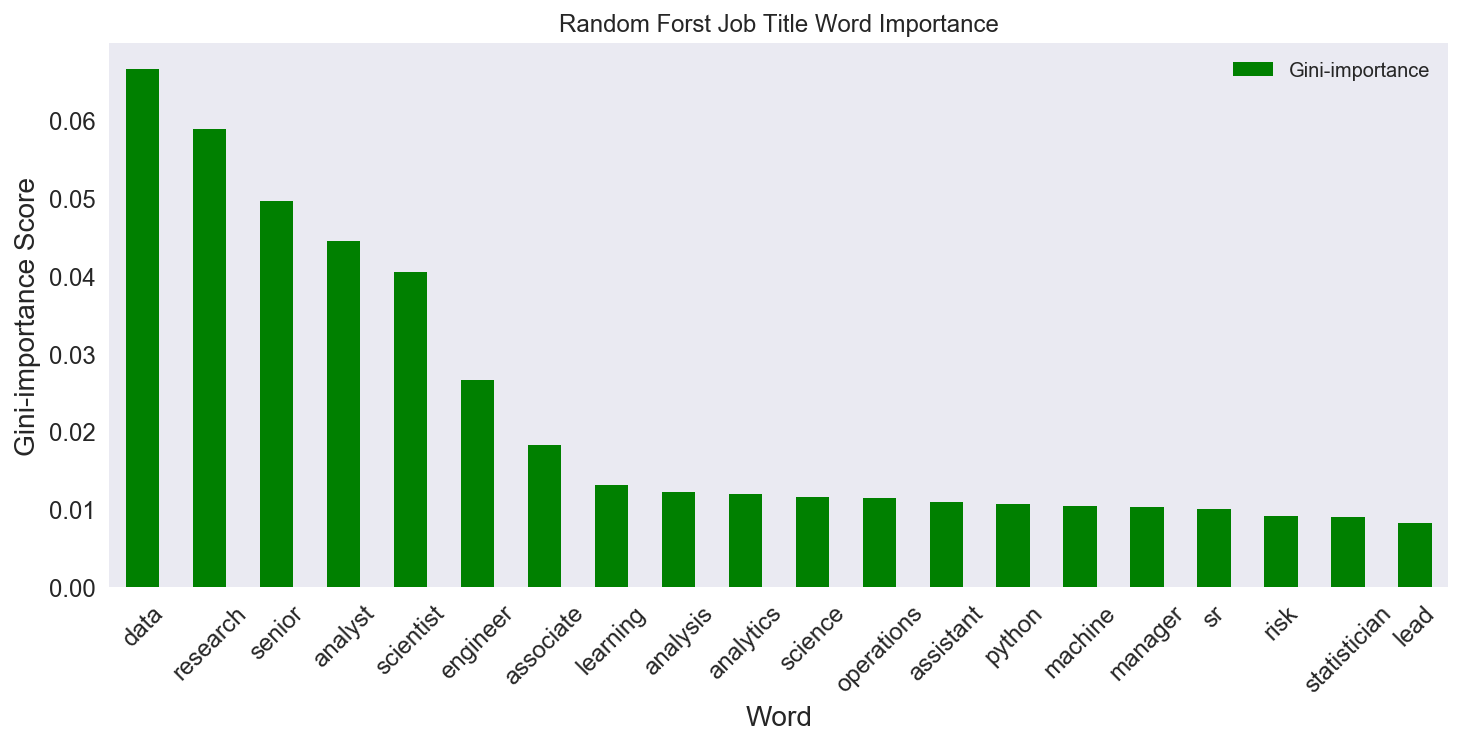

In [114]:
rf_jt_feats= {}
for feature, importance in zip(cv.get_feature_names(), rf_jt.feature_importances_):
    rf_jt_feats[feature] = importance
    
rf_jt_feat_importances = pd.DataFrame.from_dict(rf_jt_feats, orient='index').rename(columns={0:'Gini-importance'})
rf_jt_feat_importances.sort_values(by='Gini-importance', ascending = False).head(20).plot(kind = 'bar', 
                                                                            rot = 45,               
                                                                            figsize = (12,5), 
                                                                            fontsize = 12, 
                                                                            color = 'green',
                                                                           title = 'Random Forst Job Title Word Importance')
plt.xlabel('Word', fontsize = 14)
plt.ylabel('Gini-importance Score', fontsize = 14)

According to the Random Forest model, the word 'data' & 'research' are very important to determine salary range, followed by word 'senior', 'analyst' and 'scientist' on the title

As we may have a glimpse previously, companies tend to offer lower salary range on research and analyst. Data scientist with senior title are on the higher salary rank. 

#### 6.5 Cross Validation

In [116]:
# Cross validate Naive Bayes using job title

GNB_score = cross_val_score(GNB, Xdtm, y, cv = 5, scoring = 'accuracy')
print ('Naive Bayes average cross validation score using job title is: ', np.mean(GNB_score))

Naive Bayes average cross validation score using job title is:  0.318006798886


In [118]:
# Cross validate Logistic Regression using job title

lr_jt_score = cross_val_score(logreg_jt, Xdtm, y, cv = 5, scoring = 'accuracy')
print ('Logistic Regression average cross validation score using job title is: ', np.mean(lr_jt_score))

Logistic Regression average cross validation score using job title is:  0.472818121252


In [119]:
rf_jt_score = cross_val_score(rf_jt, Xdtm, y, cv = 5, scoring = 'accuracy')
print ('Random Forest average cross validation score using job title is: ', np.mean(rf_jt_score))

Random Forest average cross validation score using job title is:  0.469919199166


## Conclusion:

Using city or job title alone do not make very impressive predictions. 
To improve prediction accuracy, we can further try to combine city, job title, and even job description to make predictions. 